In [ ]:
# Epinion / Trust Network
https://www.kaggle.com/masoud3/epinions-trust-network


In [25]:
import cudf
import cugraph
import pandas
import time
import os
import matplotlib

# Load the Trust Data
user_rating.txt
* MY_ID This stores Id of the member who is making the trust/distrust statement 
* OTHER_ID The other ID is the ID of the member being trusted/distrusted 
* VALUE Value = 1 for trust and -1 for distrust 
* CREATION It is the date on which the trust was made 

In [17]:
trust_gdf = cudf.read_csv('./epinions/user_rating.txt',
                          delimiter='\t',
                          names=['my_id','other_id','value','creation'],
                          dtype=['int64', 'int64', 'int32', 'str'], 
                          header=None                       
                         )

In [18]:
trust_gdf.head(5)

,my_id,other_id,value,creation
0,3287060356,232085,-1,2001/01/10
1,3288305540,709420,1,2001/01/10
2,3290337156,204418,-1,2001/01/10
3,3294138244,269243,-1,2001/01/10
4,3294138244,170692484,-1,2001/01/10


In [19]:
print("Number of positive ratings is {:,}".format(len(trust_gdf.query('value > 0'))) )

Number of positive ratings is 717,667


In [20]:
print("Number of negative ratings is {:,}".format(len(trust_gdf.query('value < 0'))))

Number of negative ratings is 123,705


In [21]:
# Let's build a graph (Undirected)
G = cugraph.Graph()

In [23]:
G.from_cudf_edgelist(trust_gdf, source="my_id", destination="other_id", edge_attr='value')

In [24]:
(G.number_of_nodes(), G.number_of_edges())

(131828, 711783)

<AxesSubplot:xlabel='degree'>

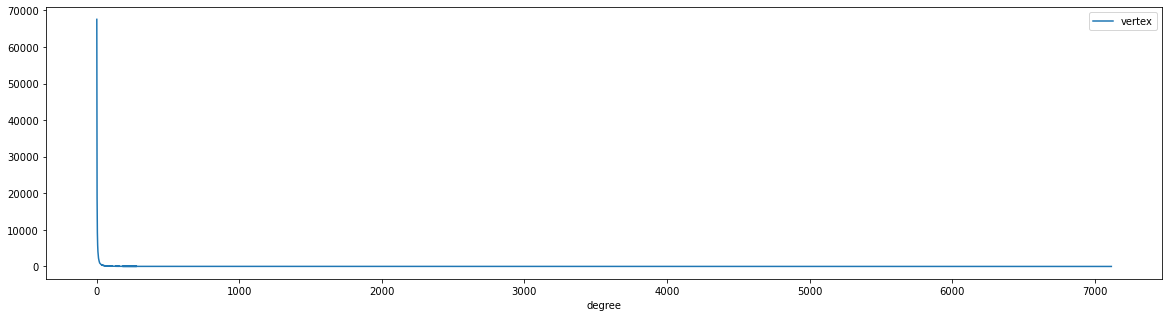

In [56]:
# Degree distribution
%matplotlib inline
G.degree().groupby('degree').count().sort_values(by='vertex', ascending=False).to_pandas().plot(legend=True, figsize=(20, 5))

In [59]:
# What is that max degree value
G.degree().groupby('degree').count().max()

vertex    67573
dtype: int32

<AxesSubplot:xlabel='degree'>

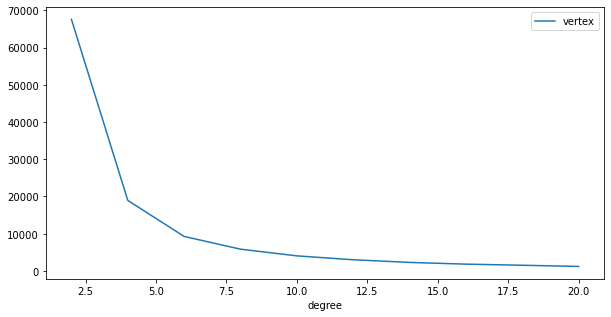

In [57]:
# Degree distribution
%matplotlib inline
G.degree().groupby('degree').count().sort_values(by='vertex', ascending=False).head(10).to_pandas().plot(legend=True, figsize=(10, 5))

<AxesSubplot:xlabel='degree'>

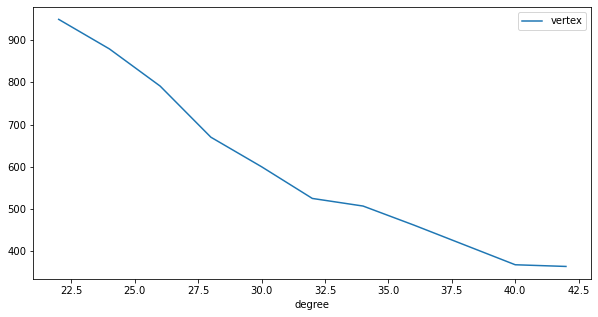

In [58]:
# Degree distribution
%matplotlib inline
G.degree().groupby('degree').count().query('vertex < 1000').sort_values(by='vertex', ascending=False).head(10).to_pandas().plot(legend=True, figsize=(10, 5))

In [50]:
G.degree().groupby('degree').count().max()

vertex    67573
dtype: int32